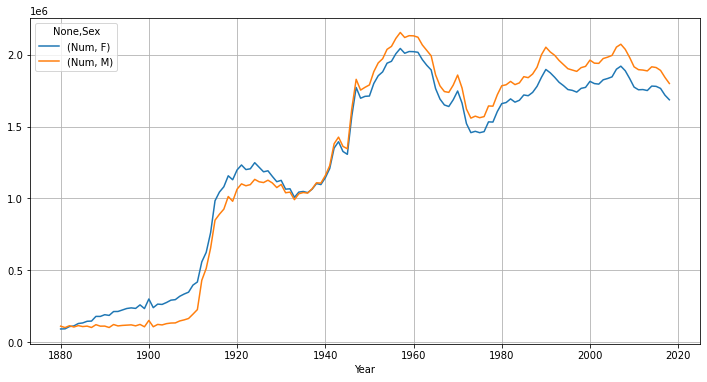

In [27]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

txt_files = glob.glob('./Names/*.txt')

x = txt_files[1]
year = []
li = []
for i in txt_files:
    current_year = int(i[-8:-4])
    year.append(current_year)
    df = pd.read_csv(i, sep=',', header=None, names=['Name', 'Sex', 'Num'])
    df["Year"] = current_year
    li.append(df)
data = pd.concat(li, ignore_index=True)
x = data.groupby(['Sex', 'Year']).sum().reset_index()
y = x.pivot(index='Year', columns='Sex')
z = y.plot(figsize=(12, 6), grid=True)
# z = y.plot(figsize=(12, 6), grid=True)
# z
#plt.show()